          Date/Time      Lat      Lon    Base                    geometry
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512  POINT (-74.00210 40.22010)
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512  POINT (-74.00270 40.75000)
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512  POINT (-73.98640 40.75590)
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512  POINT (-73.98890 40.74500)
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512  POINT (-73.94440 40.81450)


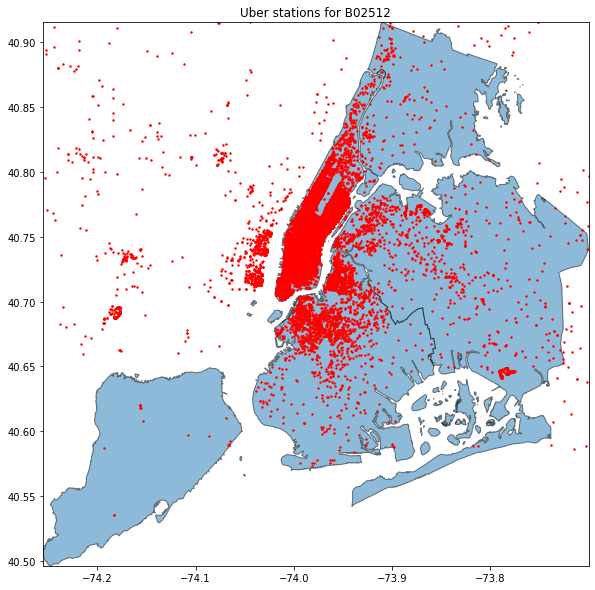

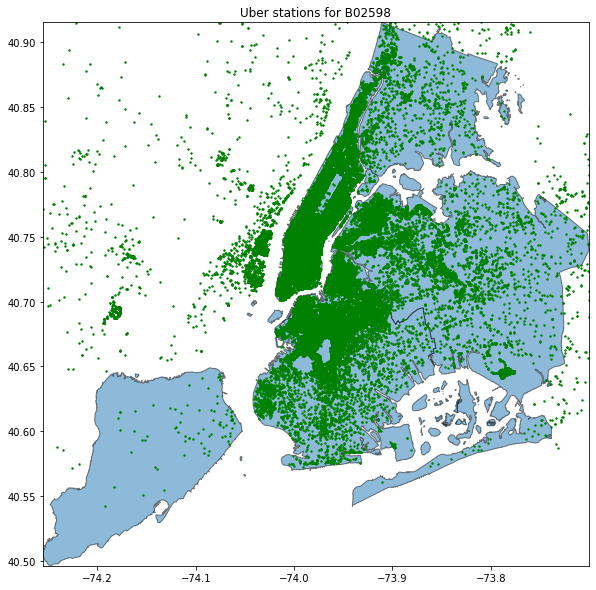

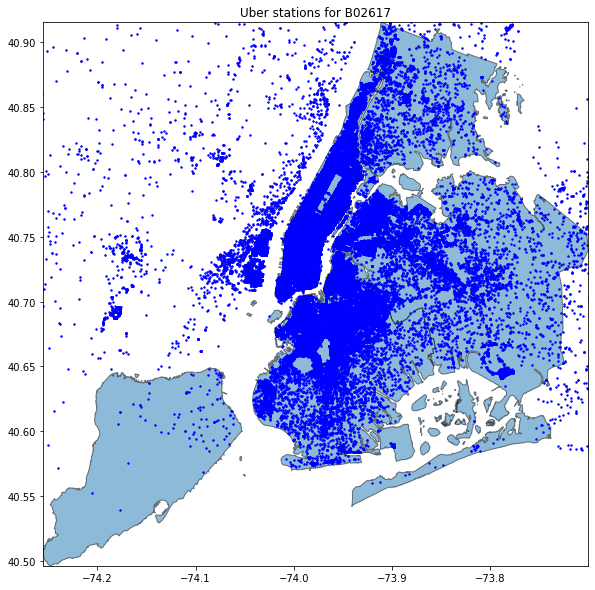

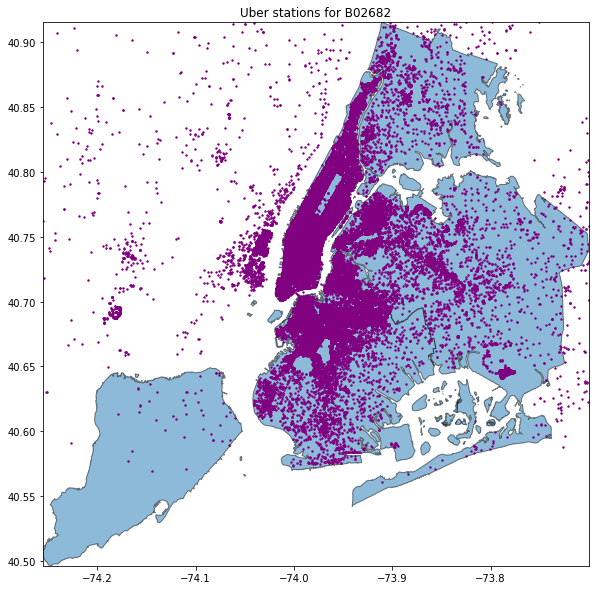

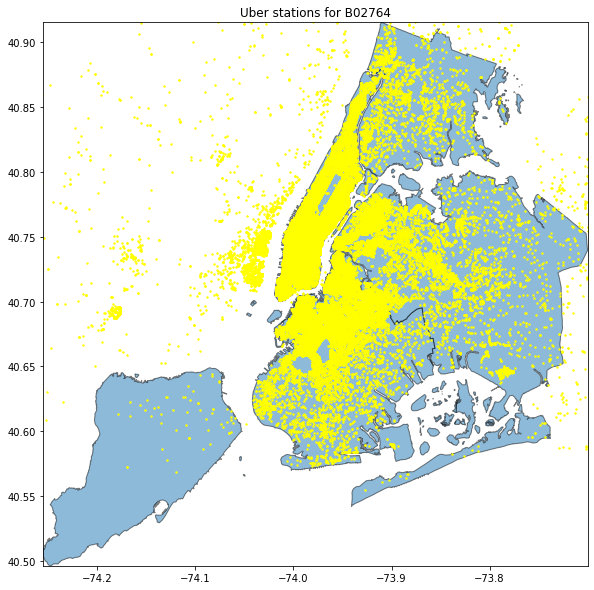

In [17]:
import geopandas as gpd
from shapely.geometry import Point


uber_df = pd.read_csv("uber-raw-data-sep14.csv")
point_lst = [Point(xy) for xy in zip(uber_df['Lon'], uber_df['Lat'])]
uber_gdf = gpd.GeoDataFrame(uber_df, crs='epsg:4326', geometry=point_lst)
print(uber_gdf.head(5)) #смотрю, что добавилось поле geometry с точками

#Нью-Йорк состоит из 5 округов: Бруклин, Квинс, Манхэттен, Бронкс и Статен-Айленд
ny_gdf = gpd.read_file('ny') #считываю файл
ny_gdf = ny_gdf.to_crs(4326) #изначально данные в формате wsg84, перевожу для сопоставления
#ny_gdf.plot(figsize=(10, 10)) #вывожу карту на просмотр
bounds = ny_gdf.total_bounds #вычисляю границы геодатафрейма ny_gdf 

# Группировка станций по идентификатору
grouped_stations_gdf = uber_gdf.groupby('Base')
#print(grouped_stations_gdf.head(5)) # проверка, что группировка выполнена верно

# Цвета для каждой группы
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Отображаем каждую группу точек на своей картинке
for i, (name, group) in enumerate(grouped_stations_gdf):
    # Создаем новый объект figure и axes для каждой картинки
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(bounds[0], bounds[2])
    ax.set_ylim(bounds[1], bounds[3])
    ny_gdf.plot(ax=ax, alpha=0.5, edgecolor='k')
    color = colors[i % len(colors)]
    group.plot(ax=ax, color=color, label=name, markersize=2)
    ax.set_title(f'Uber stations for {name}')
    plt.show()

  